<a href="https://colab.research.google.com/github/RonaldCedeno/MNIST-Neural_Network/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification - Neural Network: Multi-Layer Perceptron

A widely used dataset called MNIST will be used, using Keras for model creation and training.

MNIST data set contains:

- 60,000 training data
- 10,000 validation data
- Each image is 28x28 pixels
- The classification will be carried out using 1 Neural Network with a hidden layer containing 15 neurons.

## Libraries

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD 

import matplotlib.pyplot as plt
import numpy as np

## Reading and visualization of data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('x_train: {}\ny_train: {}\nx_test: {}\ny_test: {}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


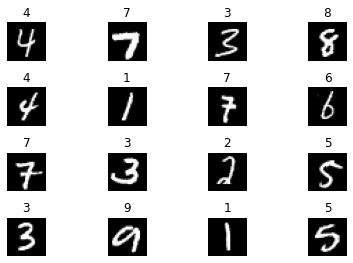

In [4]:
# Show 16 random images taken from the 'x_train' set
ids_imgs = np.random.randint(0, x_train.shape[0], 16)
for i in range(len(ids_imgs)):
  img = x_train[ids_imgs[i],:,:]
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(y_train[ids_imgs[i]])
plt.savefig('training_data.png')

## Preprocessing

In [5]:
# Each of the images must be "flattened" into a vector of 28x28 = 784 values
# It will go from 60,000 data of 28x28 (60000x28x28) to 60,000 data of 784 (60000x784)
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

# Intensities are Normalized to the range 0-1
X_train = X_train/255.0
X_test = X_test/255.0

# Finally, for multiclass classification y_train & y_test is converted to "One Hot Encoding" representation
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

## Model Creation

- **Input layer:** Its dimension will be 784 (The size of each flattened image)
- **Hidden layer:** 15 neurons with ReLU activation
- **Output layer:** Activation function "Softmax" (Multiclass Classification) and a total of 10 categories

In [6]:
# For training reproducibility
np.random.seed(1)

# Dimension of the INPUT and OUTPUT vectors of the training data
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

In [7]:
modelo = Sequential()

# Create input and hidden layer
modelo.add(Dense(15, input_dim=input_dim, activation='relu'))

# Create output layer
modelo.add(Dense(output_dim, activation='softmax'))

In [8]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


## Compilation and training

Using Gradient Descender
- Learning rate = 0.2
- Error function: Cross Entropy
- Performance metric: Accuracy

In [9]:
sgd = SGD(learning_rate=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [10]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [11]:
# For the training, 50 iterations and a batch size of 1024 will be used.
num_epochs = 50
batch_size = 1024
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
59/59 - 2s - loss: 1.0027 - accuracy: 0.7310 - 2s/epoch - 31ms/step
Epoch 2/50
59/59 - 1s - loss: 0.4380 - accuracy: 0.8821 - 758ms/epoch - 13ms/step
Epoch 3/50
59/59 - 1s - loss: 0.3701 - accuracy: 0.8979 - 763ms/epoch - 13ms/step
Epoch 4/50
59/59 - 1s - loss: 0.3411 - accuracy: 0.9038 - 940ms/epoch - 16ms/step
Epoch 5/50
59/59 - 1s - loss: 0.3222 - accuracy: 0.9086 - 1s/epoch - 17ms/step
Epoch 6/50
59/59 - 1s - loss: 0.3087 - accuracy: 0.9129 - 680ms/epoch - 12ms/step
Epoch 7/50
59/59 - 1s - loss: 0.2983 - accuracy: 0.9154 - 680ms/epoch - 12ms/step
Epoch 8/50
59/59 - 1s - loss: 0.2899 - accuracy: 0.9177 - 807ms/epoch - 14ms/step
Epoch 9/50
59/59 - 1s - loss: 0.2808 - accuracy: 0.9204 - 747ms/epoch - 13ms/step
Epoch 10/50
59/59 - 1s - loss: 0.2732 - accuracy: 0.9226 - 705ms/epoch - 12ms/step
Epoch 11/50
59/59 - 1s - loss: 0.2669 - accuracy: 0.9241 - 749ms/epoch - 13ms/step
Epoch 12/50
59/59 - 1s - loss: 0.2602 - accuracy: 0.9265 - 760ms/epoch - 13ms/step
Epoch 13/50
59/59 -

In [12]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


## Results and visualization

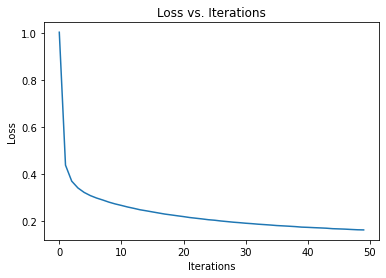

In [13]:
# Loss vs. Iterations
_ = plt.subplot(1,1,1)
_ = plt.plot(historia.history['loss'])
_ = plt.title("Loss vs. Iterations")
_ = plt.ylabel("Loss")
_ = plt.xlabel("Iterations")
plt.savefig('loss_iterations.png')

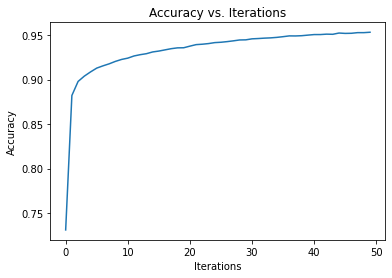

In [14]:
# Accuracy vs. Iterations
_ = plt.subplot(1,1,1)
_ = plt.plot(historia.history['accuracy'])
_ = plt.title("Accuracy vs. Iterations")
_ = plt.ylabel("Accuracy")
_ = plt.xlabel("Iterations")
plt.savefig('accuracy_iterations.png')

In [15]:
# Prediction on the validation set
Y_pred = modelo.predict(X_test)

In [16]:
categ_original = np.argmax(Y_test, axis=1)
categ_prediction = np.argmax(Y_pred, axis=1)

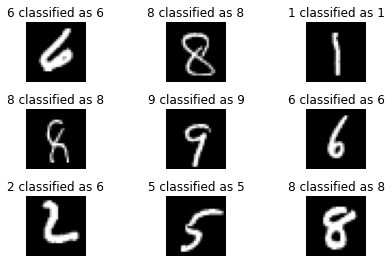

In [24]:
# Show 9 random images of the prediction
ids_imgs = np.random.randint(0, X_test.shape[0], 9)
for i in range(len(ids_imgs)):
  idx = ids_imgs[i]
  img = X_test[idx,:].reshape(28,28)

  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title('{} classified as {}'.format(categ_original[idx], categ_prediction[idx]))
plt.savefig('prediction.png')

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(categ_original, categ_prediction)

array([[ 966,    0,    1,    1,    0,    6,    3,    1,    0,    2],
       [   0, 1122,    3,    2,    0,    1,    1,    1,    5,    0],
       [   5,    5,  977,    9,    5,    1,   10,    8,   12,    0],
       [   1,    1,   12,  951,    0,   17,    0,   10,   12,    6],
       [   1,    1,    4,    0,  933,    0,    9,    3,    4,   27],
       [   8,    2,    4,   13,    3,  822,   10,    4,   18,    8],
       [   9,    3,    2,    1,   10,   16,  913,    0,    2,    2],
       [   1,   12,   19,   10,    2,    1,    0,  962,    1,   20],
       [   3,    4,    5,   21,    7,   18,   11,   10,  889,    6],
       [   7,    9,    0,    8,   17,    8,    0,    5,    4,  951]])

In [19]:
print('Total validation data: {}\n'.format(x_test.shape[0]))
print('Correctly classified data: {}'.format(len(np.where(categ_original == categ_prediction)[0])))
print('Misclassified data: {}'.format(len(np.where(categ_original != categ_prediction)[0])))

Total validation data: 10000

Correctly classified data: 9486
Misclassified data: 514


In [20]:
print('Accuracy in the validation set: {:.2f}%'.format(modelo.evaluate(X_test, Y_test, verbose=0)[1] * 100))

Accuracy in the validation set: 94.86%
